# import necessary modules

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse

import math

# DataFraming

Read .csv data into a DataFrame

In [2]:
dataset = pd.read_csv('../data/headbrain.csv')
dataset

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [3]:
size = dataset['Head Size(cm^3)']
print(size)

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64


0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain Weight(grams), Length: 237, dtype: int64


<Axes: >

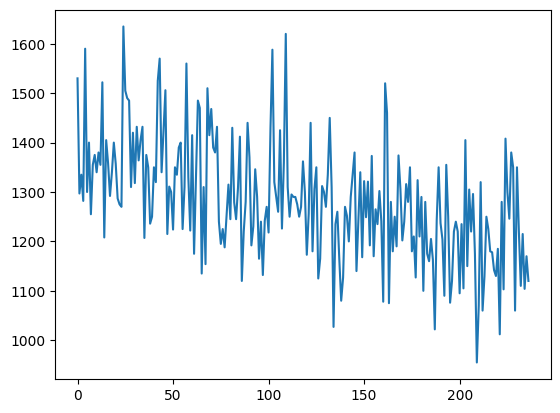

In [4]:
weight = dataset['Brain Weight(grams)']
print(weight)
weight.plot()

<Axes: >

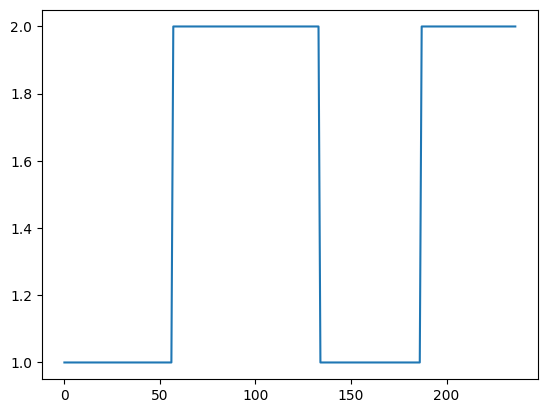

In [5]:
age_range = dataset['Age Range']
age_range.plot()

<Axes: >

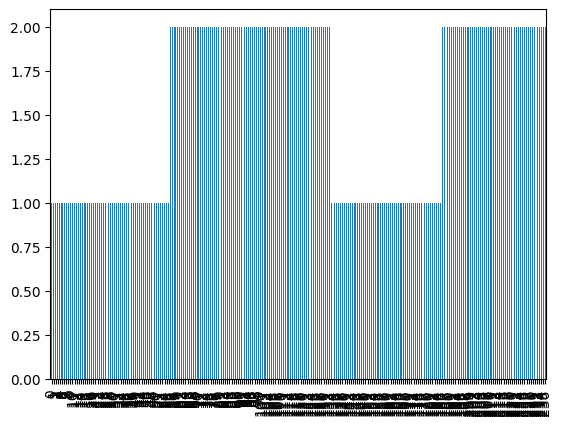

In [6]:
dataset['Age Range'].plot(kind='bar')

In [7]:
dataset['Age Range'].unique()

array([1, 2])

# Visualizing Dataset

Visualize relation between each pair of features

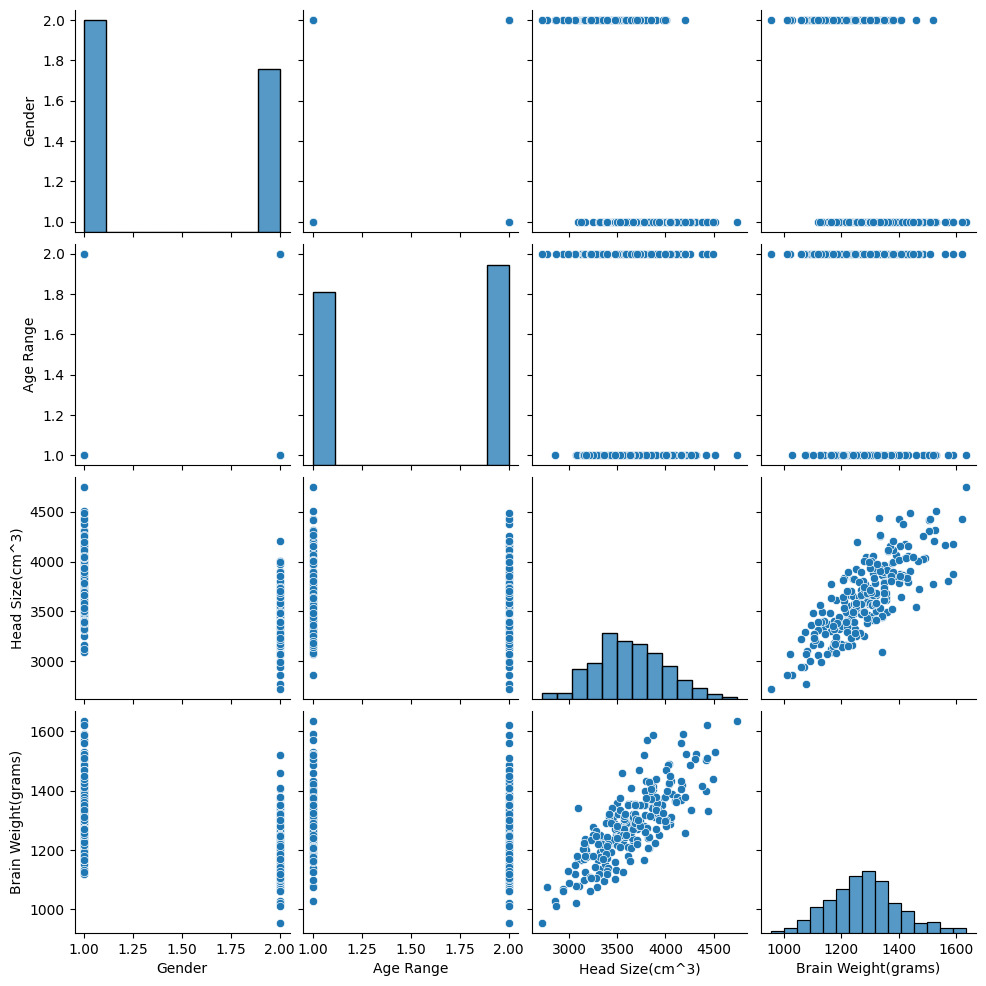

In [8]:
sns.pairplot(dataset)

# Calculate correlation between features of dataset

In [9]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# https://stackoverflow.com/questions/65039955/how-to-print-correlated-features-using-python-pandas
c = dataset.corr().abs()
# c
s = c.unstack()
# s
# corr_sorted = s.sort_values()
corr_sorted = s.sort_values(kind = 'quicksort', ascending = False)
n_feature = len(dataset.columns)
#remove the elements showing correlation with the feature itself 
corr_sorted = corr_sorted[n_feature :]
corr_sorted

Head Size(cm^3)      Brain Weight(grams)    0.799570
Brain Weight(grams)  Head Size(cm^3)        0.799570
Gender               Head Size(cm^3)        0.514050
Head Size(cm^3)      Gender                 0.514050
Gender               Brain Weight(grams)    0.465266
Brain Weight(grams)  Gender                 0.465266
Age Range            Brain Weight(grams)    0.169438
Brain Weight(grams)  Age Range              0.169438
Age Range            Head Size(cm^3)        0.105428
Head Size(cm^3)      Age Range              0.105428
Gender               Age Range              0.088652
Age Range            Gender                 0.088652
dtype: float64

# Top k most correlated pairs

In [10]:
def get_top_correlations(dataset, k) :
    c = dataset.corr().abs()
    s = c.unstack()
    
    corr_sorted = s.sort_values(kind = 'quicksort', ascending = False)
    n_feature = len(dataset.columns)
    
    #remove the elements showing correlation with the feature itself 
    corr_sorted = corr_sorted[n_feature :]
    
    #return top k most correlated dfeature pairs
    return corr_sorted[:k]

In [11]:
k = 1
print("Top {} Absolute Correlations".format(k))
print(get_top_correlations(dataset, k), end = '\n\n')

k = 2
print("Top {} Absolute Correlations".format(k))
print(get_top_correlations(dataset, k))

Top 1 Absolute Correlations
Head Size(cm^3)  Brain Weight(grams)    0.79957
dtype: float64

Top 2 Absolute Correlations
Head Size(cm^3)      Brain Weight(grams)    0.79957
Brain Weight(grams)  Head Size(cm^3)        0.79957
dtype: float64


In [12]:
for k in range(1 , len(dataset.columns)) :
    print("Top {} Absolute Correlations".format(k))
    print(get_top_correlations(dataset, k), end = '\n\n')

Top 1 Absolute Correlations
Head Size(cm^3)  Brain Weight(grams)    0.79957
dtype: float64

Top 2 Absolute Correlations
Head Size(cm^3)      Brain Weight(grams)    0.79957
Brain Weight(grams)  Head Size(cm^3)        0.79957
dtype: float64

Top 3 Absolute Correlations
Head Size(cm^3)      Brain Weight(grams)    0.79957
Brain Weight(grams)  Head Size(cm^3)        0.79957
Gender               Head Size(cm^3)        0.51405
dtype: float64



# Converting dataframes into NumPy Arrays

Machine Learning handle arrays not dataframes

In [13]:
X = np.array(size).reshape(-1,1)
y = np.array(weight).reshape(-1,1)
# X,y

# Training the Model

We are using Linear regression model as imported from sklearn library and then it's being trained on x and y (any 2 major axis of datasets)

In [14]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

# Mean Sqaured Error & R - Squared Value

In [15]:
regression_model_mse = mse(X,y)
print('Mean Squared Error:\t',math.sqrt(regression_model_mse))
print("R squared value\t\t",model.score(X,y))

Mean Squared Error:	 2367.495611943946
R squared value		 0.639311719957


In [16]:
print(model.coef_)
print(model.intercept_)

[[0.26342934]]
[325.57342105]


# Visualization

Visualize the dataset with the fit model using matplotlib.

Text(0, 0.5, 'Brain Weight')

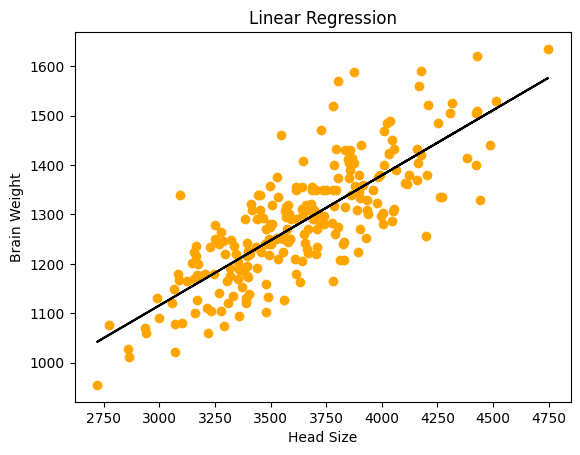

In [17]:
plt.scatter(X,y, color = 'orange')
plt.plot(X,model.predict(X), color = 'black')
plt.title('Linear Regression')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

# Prediction

We will predict the Brain weight by giving an input of Brain Size

In [18]:
val = model.predict([[2000]] )
val

array([[852.43210003]])

In [19]:
print('Prediction Brain Weight by the model:\t',val[0,0], 'grams')

Prediction Brain Weight by the model:	 852.4321000282413 grams
